## Predictive Modeling on Hospital Readmission :

In [ ]:
# Required installations
!pip install scipy
pip install tabulate
!pip install keras-tuner

### Inport the data from the csv files to the pandas dataframe

In [1]:
import pandas as pd

In [2]:
admissions  = pd.read_csv('ADMISSIONS.csv', low_memory=False)
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,7/17/2138 19:04,7/21/2138 15:48,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,10/20/2101 19:08,10/31/2101 13:58,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,10/20/2101 17:09,10/20/2101 19:24,HYPOTENSION,0,1
2,3,4,185777,3/16/2191 0:28,3/23/2191 18:41,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,3/15/2191 13:10,3/16/2191 1:10,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2/2/2103 4:31,2/4/2103 12:15,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,5/30/2175 7:15,6/15/2175 16:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1


In [3]:
patients  = pd.read_csv('PATIENTS.csv', low_memory=False)
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [4]:
diagnosis = pd.read_csv('DIAGNOSES_ICD.csv', low_memory=False)
diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [5]:
proc = pd.read_csv('PROCEDURES_ICD.csv', low_memory=False)
proc.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [6]:
drug = pd.read_csv('DRGCODES.csv', low_memory=False)
drug.head()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [7]:
cptevents_df = pd.read_csv('CPTEVENTS.csv', low_memory=False)
cptevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
0,317,11743,129545,ICU,NaN,99232,99232.0,NaN,6.0,Evaluation and management,Hospital inpatient services,NaN
1,318,11743,129545,ICU,NaN,99232,99232.0,NaN,7.0,Evaluation and management,Hospital inpatient services,NaN
2,319,11743,129545,ICU,NaN,99232,99232.0,NaN,8.0,Evaluation and management,Hospital inpatient services,NaN
3,320,11743,129545,ICU,NaN,99232,99232.0,NaN,9.0,Evaluation and management,Hospital inpatient services,NaN
4,321,6185,183725,ICU,NaN,99223,99223.0,NaN,1.0,Evaluation and management,Hospital inpatient services,NaN


In [8]:
icustay_df = pd.read_csv('ICUSTAYS.csv', low_memory=False)
icustay_df .head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [9]:
notes_df= pd.read_csv('NOTEEVENTS.csv', low_memory=False)
notes_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


### Remove the unnecessary columns from each dataframe

In [10]:
admissions = admissions.drop(columns=['ROW_ID','ADMISSION_LOCATION','DISCHARGE_LOCATION',
                                                                          'LANGUAGE', 'RELIGION', 'MARITAL_STATUS',
                                                                          'ETHNICITY','EDREGTIME','EDOUTTIME',
                                                                          'DIAGNOSIS','HAS_CHARTEVENTS_DATA',
                                     'DEATHTIME','INSURANCE','HOSPITAL_EXPIRE_FLAG'])

In [11]:
notes_df = notes_df.drop(columns=['CHARTDATE','CHARTTIME', 'STORETIME', 'CGID', 'ISERROR'])
notes_df.count()

ROW_ID         2083180
SUBJECT_ID     2083180
HADM_ID        1851344
CATEGORY       2083180
DESCRIPTION    2083180
TEXT           2083180
dtype: int64

In [12]:
# First, convert the ADMITTIME and DISCHTIME columns to datetime format
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'], errors='coerce')
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'], errors='coerce')

# Calculate the length of stay as the difference between 'DISCHTIME' and 'ADMITTIME'
admissions['LEN_OF_STAY'] = (admissions['DISCHTIME'] - admissions['ADMITTIME']).dt.days
admissions.head()

# Display the relevant columns with length of stay
#sorted_df = merge_notes_diag_proc_adm_df.sort_values(by='LEN_OF_STAY', ascending=False)
#sorted_df.head(30)


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NEWBORN,3
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NEWBORN,2
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,16


# Data Cleanup to remove the patients data where the discharge date is not given or it is lesser than the admit date (may be a data entry issue). We have removed 100 such records. 

In [13]:
# Remove records where LEN_OF_STAY is less than 0
admissions = admissions[admissions['LEN_OF_STAY'] >= 0]

In [14]:
admissions.count()

SUBJECT_ID        58878
HADM_ID           58878
ADMITTIME         58878
DISCHTIME         58878
ADMISSION_TYPE    58878
LEN_OF_STAY       58878
dtype: int64

In [15]:
# A readmission occurs if a patient's next admission is within 30 days of their previous discharge
admissions['Previous_DISCHTIME'] = admissions.groupby('SUBJECT_ID')['DISCHTIME'].shift(1)

admissions['Readmission'] = (admissions['ADMITTIME'] - admissions['Previous_DISCHTIME']).dt.days <= 60
admissions['Readmission'] = admissions['Readmission'].fillna(False)

admissions.head()
# Calculate the number of readmissions for each SUBJECT_ID
#admissions['Num_Readmissions'] = admissions.groupby('SUBJECT_ID')['Readmission'].cumsum()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NEWBORN,3,NaT,False
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NEWBORN,2,NaT,False
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,16,NaT,False


In [16]:
admissions.count()

SUBJECT_ID            58878
HADM_ID               58878
ADMITTIME             58878
DISCHTIME             58878
ADMISSION_TYPE        58878
LEN_OF_STAY           58878
Previous_DISCHTIME    12433
Readmission           58878
dtype: int64

In [17]:
readmission_true = admissions[admissions['Readmission'] == True]
admission_type_counts = readmission_true['ADMISSION_TYPE'].value_counts()
print(admission_type_counts)

ADMISSION_TYPE
EMERGENCY    4373
ELECTIVE      334
URGENT        100
NEWBORN        34
Name: count, dtype: int64


### Merge Patients dataframe to get the age -->

In [18]:
admissions = pd.merge(admissions, patients, on=['SUBJECT_ID'], how='inner')

In [19]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58878 entries, 0 to 58877
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SUBJECT_ID          58878 non-null  int64         
 1   HADM_ID             58878 non-null  int64         
 2   ADMITTIME           58878 non-null  datetime64[ns]
 3   DISCHTIME           58878 non-null  datetime64[ns]
 4   ADMISSION_TYPE      58878 non-null  object        
 5   LEN_OF_STAY         58878 non-null  int64         
 6   Previous_DISCHTIME  12433 non-null  datetime64[ns]
 7   Readmission         58878 non-null  bool          
 8   ROW_ID              58878 non-null  int64         
 9   GENDER              58878 non-null  object        
 10  DOB                 58878 non-null  object        
 11  DOD                 22501 non-null  object        
 12  DOD_HOSP            14986 non-null  object        
 13  DOD_SSN             19018 non-null  object    

In [20]:
# Keep only the required columns in the merged dataframe
admissions = admissions.drop(columns=['ROW_ID','DOD_HOSP','DOD_SSN'])

In [21]:
from datetime import datetime

admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'], errors='coerce')
admissions['DOB'] = pd.to_datetime(admissions['DOB'], errors='coerce')

# Function to calculate age in years
def calculate_age(dob, admittime):
    # Return the difference in years accounting for whether the birthday has occurred yet this year
    age = admittime.year - dob.year - ((admittime.month, admittime.day) < (dob.month, dob.day))
    return age

# Apply the function across the DataFrame
admissions['AGE'] = admissions.apply(lambda x: calculate_age(x['DOB'], x['ADMITTIME']), axis=1)

# Display the first few rows to confirm the age calculation
admissions.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NEWBORN,3,NaT,False,M,2138-07-17,NaN,0,0
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False,M,2025-04-11,2102-06-14 00:00:00,1,76
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False,F,2143-05-12,NaN,0,47
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NEWBORN,2,NaT,False,M,2103-02-02,NaN,0,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,16,NaT,False,F,2109-06-21,NaN,0,65


### Extract the patients records with admission_type = EMERGENCY and URGENT

In [22]:
admissions = admissions[admissions['ADMISSION_TYPE'].isin(['EMERGENCY', 'URGENT'])]
admissions.reset_index(drop=True, inplace=True)
admissions.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE
0,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False,M,2025-04-11,2102-06-14 00:00:00,1,76
1,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False,F,2143-05-12,NaN,0,47
2,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,NaT,False,M,2108-01-26,2149-11-14 00:00:00,1,41
3,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,NaT,False,F,2128-02-22,2178-11-14 00:00:00,1,50
4,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,NaT,False,F,2127-02-27,NaN,0,39


In [23]:
readmission_true = admissions[admissions['Readmission'] == True]
admission_type_counts = readmission_true['ADMISSION_TYPE'].value_counts()
print(admission_type_counts)

ADMISSION_TYPE
EMERGENCY    4373
URGENT        100
Name: count, dtype: int64


In [24]:
# Filter the DataFrame to only include rows where Readmission is True
readmission_true_records = admissions[admissions['Readmission'] == True]

# Display a sample of these records
readmission_true_records.count()


SUBJECT_ID            4473
HADM_ID               4473
ADMITTIME             4473
DISCHTIME             4473
ADMISSION_TYPE        4473
LEN_OF_STAY           4473
Previous_DISCHTIME    4473
Readmission           4473
GENDER                4473
DOB                   4473
DOD                   2646
EXPIRE_FLAG           4473
AGE                   4473
dtype: int64

### Cleanup the Diagnosis Dataframe, combine the diagnosis codes associated with each patient in single record

In [25]:
diagnosis.count()

ROW_ID        651047
SUBJECT_ID    651047
HADM_ID       651047
SEQ_NUM       651000
ICD9_CODE     651000
dtype: int64

In [26]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
diagnosis['ICD9_CODE'] = diagnosis['ICD9_CODE'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
diagnosis_aggregated = diagnosis.groupby(['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].agg('|'.join).reset_index()

# Rename columns to match the output specification
diagnosis_aggregated.columns = ['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']

# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
diagnosis_aggregated_df = pd.merge(admissions, diagnosis_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
diagnosis_aggregated_df.count()

SUBJECT_ID            43322
HADM_ID               43322
ADMITTIME             43322
DISCHTIME             43322
ADMISSION_TYPE        43322
LEN_OF_STAY           43322
Previous_DISCHTIME    10998
Readmission           43322
GENDER                43322
DOB                   43322
DOD                   20258
EXPIRE_FLAG           43322
AGE                   43322
ICD9_CODE             43322
dtype: int64

In [27]:
diagnosis_aggregated_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE
0,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False,M,2025-04-11,2102-06-14 00:00:00,1,76,0389|78559|5849|4275|41071|4280|6826|4254|2639
1,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False,F,2143-05-12,NaN,0,47,042|1363|7994|2763|7907|5715|04111|V090|E9317
2,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,NaT,False,M,2108-01-26,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019
3,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,NaT,False,F,2128-02-22,2178-11-14 00:00:00,1,50,1913
4,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,NaT,False,F,2127-02-27,NaN,0,39,41401|4111|25000|4019|2720


# Procedures data frame cleanup and merge the procedure codes for each patient

In [28]:
proc.count()

ROW_ID        240095
SUBJECT_ID    240095
HADM_ID       240095
SEQ_NUM       240095
ICD9_CODE     240095
dtype: int64

In [29]:
proc = proc.rename(columns={'ICD9_CODE': 'PROC_ICD9_CODE'})

In [30]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
proc['PROC_ICD9_CODE'] = proc['PROC_ICD9_CODE'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
proc_aggregated = proc.groupby(['SUBJECT_ID', 'HADM_ID'])['PROC_ICD9_CODE'].agg('|'.join).reset_index()

# Rename columns to match the output specification
proc_aggregated.columns = ['SUBJECT_ID', 'HADM_ID', 'PROC_ICD9_CODE']

# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
proc_aggregated_df = pd.merge(diagnosis_aggregated_df,proc_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
proc_aggregated_df.count()

SUBJECT_ID            37240
HADM_ID               37240
ADMITTIME             37240
DISCHTIME             37240
ADMISSION_TYPE        37240
LEN_OF_STAY           37240
Previous_DISCHTIME     9213
Readmission           37240
GENDER                37240
DOB                   37240
DOD                   17883
EXPIRE_FLAG           37240
AGE                   37240
ICD9_CODE             37240
PROC_ICD9_CODE        37240
dtype: int64

In [31]:
## proc_aggregated_df = proc_aggregated_df.rename(columns={'ICD9_CODE_x': 'ICD9_CODE'})
## proc_aggregated_df = proc_aggregated_df.drop(columns=['ICD9_CODE_y'])
proc_aggregated_df.count()

SUBJECT_ID            37240
HADM_ID               37240
ADMITTIME             37240
DISCHTIME             37240
ADMISSION_TYPE        37240
LEN_OF_STAY           37240
Previous_DISCHTIME     9213
Readmission           37240
GENDER                37240
DOB                   37240
DOD                   17883
EXPIRE_FLAG           37240
AGE                   37240
ICD9_CODE             37240
PROC_ICD9_CODE        37240
dtype: int64

In [32]:
proc_aggregated_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE
0,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False,M,2025-04-11,2102-06-14 00:00:00,1,76,0389|78559|5849|4275|41071|4280|6826|4254|2639,9604|9962|8964|9672|3893|966
1,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False,F,2143-05-12,NaN,0,47,042|1363|7994|2763|7907|5715|04111|V090|E9317,3893|8872|3323
2,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,NaT,False,M,2108-01-26,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604
3,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,NaT,False,F,2128-02-22,2178-11-14 00:00:00,1,50,1913,159|113|113|9229|9925
4,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,NaT,False,F,2127-02-27,NaN,0,39,41401|4111|25000|4019|2720,3612|3615|3961|3761|8872


In [33]:
unique_values = proc_aggregated_df['Previous_DISCHTIME'].dropna().unique()
print(unique_values)

<DatetimeArray>
['2134-12-31 16:05:00', '2134-09-24 16:15:00', '2153-09-08 19:10:00',
 '2186-07-20 16:00:00', '2131-05-08 14:00:00', '2118-07-20 12:30:00',
 '2155-03-06 15:00:00', '2174-01-03 18:30:00', '2196-02-04 17:48:00',
 '2162-03-10 13:15:00',
 ...
 '2147-12-01 16:45:00', '2152-06-13 15:00:00', '2155-01-09 13:32:00',
 '2191-08-07 16:19:00', '2125-09-18 13:15:00', '2197-05-31 18:00:00',
 '2197-06-25 17:00:00', '2201-03-03 16:00:00', '2156-12-08 13:45:00',
 '2157-01-12 13:00:00']
Length: 9207, dtype: datetime64[ns]


# DRGCODES dataframe cleanup and merging the DRG codes

In [34]:
drug.count()

ROW_ID           125557
SUBJECT_ID       125557
HADM_ID          125557
DRG_TYPE         125557
DRG_CODE         125557
DESCRIPTION      125494
DRG_SEVERITY      66634
DRG_MORTALITY     66634
dtype: int64

In [35]:
drug = drug[['SUBJECT_ID', 'HADM_ID', 'DRG_CODE']]

In [36]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
drug['DRG_CODE'] = drug['DRG_CODE'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
drug_aggregated = drug.groupby(['SUBJECT_ID', 'HADM_ID'])['DRG_CODE'].agg('|'.join).reset_index()
drug_aggregated.count()

SUBJECT_ID    58890
HADM_ID       58890
DRG_CODE      58890
dtype: int64

In [37]:
# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
drug_aggregated_df = pd.merge(proc_aggregated_df,drug_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
drug_aggregated_df.count()

SUBJECT_ID            37228
HADM_ID               37228
ADMITTIME             37228
DISCHTIME             37228
ADMISSION_TYPE        37228
LEN_OF_STAY           37228
Previous_DISCHTIME     9210
Readmission           37228
GENDER                37228
DOB                   37228
DOD                   17876
EXPIRE_FLAG           37228
AGE                   37228
ICD9_CODE             37228
PROC_ICD9_CODE        37228
DRG_CODE              37228
dtype: int64

In [38]:
drug_aggregated_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE
0,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False,M,2025-04-11,2102-06-14 00:00:00,1,76,0389|78559|5849|4275|41071|4280|6826|4254|2639,9604|9962|8964|9672|3893|966,416
1,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False,F,2143-05-12,NaN,0,47,042|1363|7994|2763|7907|5715|04111|V090|E9317,3893|8872|3323,489
2,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,NaT,False,M,2108-01-26,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604,14
3,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,NaT,False,F,2128-02-22,2178-11-14 00:00:00,1,50,1913,159|113|113|9229|9925,211|2
4,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,NaT,False,F,2127-02-27,NaN,0,39,41401|4111|25000|4019|2720,3612|3615|3961|3761|8872,109


In [39]:
cptevents_df.count()

ROW_ID              573146
SUBJECT_ID          573146
HADM_ID             573146
COSTCENTER          573146
CHARTDATE           101545
CPT_CD              573146
CPT_NUMBER          573128
CPT_SUFFIX              22
TICKET_ID_SEQ       471601
SECTIONHEADER       573125
SUBSECTIONHEADER    573125
DESCRIPTION         101545
dtype: int64

In [40]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
cptevents_df['CPT_CD'] = cptevents_df['CPT_CD'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
cptevents_df_aggregated = cptevents_df.groupby(['SUBJECT_ID', 'HADM_ID'])['CPT_CD'].agg('|'.join).reset_index()

# Rename columns to match the output specification
cptevents_df_aggregated.columns = ['SUBJECT_ID', 'HADM_ID', 'CPT_CD']

# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
cptevents_df_aggregated_df = pd.merge(drug_aggregated_df,cptevents_df_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
cptevents_df_aggregated_df.count()

SUBJECT_ID            32983
HADM_ID               32983
ADMITTIME             32983
DISCHTIME             32983
ADMISSION_TYPE        32983
LEN_OF_STAY           32983
Previous_DISCHTIME     8492
Readmission           32983
GENDER                32983
DOB                   32983
DOD                   15852
EXPIRE_FLAG           32983
AGE                   32983
ICD9_CODE             32983
PROC_ICD9_CODE        32983
DRG_CODE              32983
CPT_CD                32983
dtype: int64

In [41]:
icustay_df.count()

ROW_ID            61532
SUBJECT_ID        61532
HADM_ID           61532
ICUSTAY_ID        61532
DBSOURCE          61532
FIRST_CAREUNIT    61532
LAST_CAREUNIT     61532
FIRST_WARDID      61532
LAST_WARDID       61532
INTIME            61532
OUTTIME           61522
LOS               61522
dtype: int64

# "Past 6 Months Hospital Admission" and "Past 6 Months ED Admission"

In [42]:
import pandas as pd

# Path to your ADMISSIONS.csv file
file_path = 'ADMISSIONS.csv'

# Load the dataset
admissions_data = pd.read_csv(file_path)


# Convert ADMITTIME and DISCHTIME to datetime if not already done
admissions_data['ADMITTIME'] = pd.to_datetime(admissions_data['ADMITTIME'], errors='coerce')
admissions_data['DISCHTIME'] = pd.to_datetime(admissions_data['DISCHTIME'], errors='coerce')

# Sort data by patient ID and admission time to ensure sequential ordering
admissions_data = admissions_data.sort_values(by=['SUBJECT_ID', 'ADMITTIME'])

# Calculate "Past 6 Months Hospital Admission" variable
admissions_data['Past_6_Months_Hospital_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(
    lambda group: group['ADMITTIME'].apply(
        lambda x: ((group['DISCHTIME'] < x) &
                   (group['DISCHTIME'] >= x - pd.Timedelta(days=180))).sum()
    )
).reset_index(level=0, drop=True)

# Calculate "Past 6 Months ED Admission" variable
admissions_data['Past_6_Months_ED_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(
    lambda group: group['ADMITTIME'].apply(
        lambda x: ((group['ADMISSION_TYPE'] == 'EMERGENCY') &
                   (group['DISCHTIME'] < x) &
                   (group['DISCHTIME'] >= x - pd.Timedelta(days=180))).sum()
    )
).reset_index(level=0, drop=True)

# Display the first few rows to confirm
print(admissions_data.head())


C:\Users\SnehalChoudhari-I\AppData\Local\Temp\ipykernel_45280\37202884.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  admissions_data['Past_6_Months_Hospital_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(


   ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
0       1           2   163353 2138-07-17 19:04:00 2138-07-21 15:48:00   
1       2           3   145834 2101-10-20 19:08:00 2101-10-31 13:58:00   
2       3           4   185777 2191-03-16 00:28:00 2191-03-23 18:41:00   
3       4           5   178980 2103-02-02 04:31:00 2103-02-04 12:15:00   
4       5           6   107064 2175-05-30 07:15:00 2175-06-15 16:00:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN        NEWBORN  PHYS REFERRAL/NORMAL DELI   
1       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
2       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
3       NaN        NEWBORN  PHYS REFERRAL/NORMAL DELI   
4       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   

          DISCHARGE_LOCATION INSURANCE  ...           RELIGION MARITAL_STATUS  \
0                       HOME   Private  ...      NOT SPECIFIED            NaN   
1                        SNF  Medicare  ...       

C:\Users\SnehalChoudhari-I\AppData\Local\Temp\ipykernel_45280\37202884.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  admissions_data['Past_6_Months_ED_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(


In [43]:
admissions_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,0,0
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,10/20/2101 17:09,10/20/2101 19:24,HYPOTENSION,0,1,0,0
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,3/15/2191 13:10,3/16/2191 1:10,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,0,0
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,0,0
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,0,0


In [44]:
admissions_data.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA',
       'Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission'],
      dtype='object')

In [45]:
admissions_data['Past_6_Months_Hospital_Admission'].value_counts()

Past_6_Months_Hospital_Admission
0     51824
1      5492
2      1143
3       329
4       105
5        39
6        15
7        12
11        6
12        4
8         2
10        2
13        2
9         1
Name: count, dtype: int64

In [46]:
admissions_data['Past_6_Months_ED_Admission'].value_counts()

Past_6_Months_ED_Admission
0     52887
1      4631
2       988
3       287
4       100
5        40
6        15
7        11
11        6
12        4
8         2
10        2
13        2
9         1
Name: count, dtype: int64

In [47]:
# Now, merge the newly created 6-month columns into combined_df
# Assuming cptevents_df_aggregated_df and icustay_df are already defined
combined_df = pd.merge(cptevents_df_aggregated_df, admissions_data[['SUBJECT_ID', 'HADM_ID',
                                                                     'Past_6_Months_Hospital_Admission',
                                                                     'Past_6_Months_ED_Admission']],
                       on=['SUBJECT_ID', 'HADM_ID'], how='inner')

# Integrate ICU LOS data
combined_df = pd.merge(combined_df, icustay_df[['SUBJECT_ID', 'HADM_ID', 'LOS']], on=['SUBJECT_ID', 'HADM_ID'], how='inner')
combined_df = combined_df.rename(columns={'LOS': 'ICU_LOS'})
combined_df['ICU_LOS'] = combined_df['ICU_LOS'].apply(lambda x: int(x) + 1 if x < 1 else int(x))

# Check the result
combined_df.count()

SUBJECT_ID                          35767
HADM_ID                             35767
ADMITTIME                           35767
DISCHTIME                           35767
ADMISSION_TYPE                      35767
LEN_OF_STAY                         35767
Previous_DISCHTIME                   9272
Readmission                         35767
GENDER                              35767
DOB                                 35767
DOD                                 17493
EXPIRE_FLAG                         35767
AGE                                 35767
ICD9_CODE                           35767
PROC_ICD9_CODE                      35767
DRG_CODE                            35767
CPT_CD                              35767
Past_6_Months_Hospital_Admission    35767
Past_6_Months_ED_Admission          35767
ICU_LOS                             35767
dtype: int64

In [48]:
combined_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,CPT_CD,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission,ICU_LOS
0,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,NaT,False,M,2025-04-11,2102-06-14 00:00:00,1,76,0389|78559|5849|4275|41071|4280|6826|4254|2639,9604|9962|8964|9672|3893|966,416,94002|94003|94003|94003,0,0,6
1,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,NaT,False,F,2143-05-12,NaN,0,47,042|1363|7994|2763|7907|5715|04111|V090|E9317,3893|8872|3323,489,99223|99233|99233|99232|99231|99232|99232|99238,0,0,1
2,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,NaT,False,M,2108-01-26,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604,14,94003|94003|94003|94003|94003,0,0,5
3,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,NaT,False,F,2128-02-22,2178-11-14 00:00:00,1,50,1913,159|113|113|9229|9925,211|2,99233|99233|99233|99239,0,0,1
4,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,NaT,False,F,2127-02-27,NaN,0,39,41401|4111|25000|4019|2720,3612|3615|3961|3761|8872,109,94003|94002,0,0,3


### notes_df dataframe cleanup and sort the dataframe based on patient and hospital admission ID

In [49]:
notes_df.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
0,174,22532,167853.0,Discharge summary,Report,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,Discharge summary,Report,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,Discharge summary,Report,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,Discharge summary,Report,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,Discharge summary,Report,Admission Date: [**2162-3-3**] D...
5,179,53181,170490.0,Discharge summary,Report,Admission Date: [**2172-3-5**] D...
6,180,20646,134727.0,Discharge summary,Report,Admission Date: [**2112-12-8**] ...
7,181,42130,114236.0,Discharge summary,Report,Admission Date: [**2150-2-25**] ...
8,182,56174,163469.0,Discharge summary,Report,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,Discharge summary,Report,Admission Date: [**2118-12-7**] ...


In [50]:
# Count the occurrences of each category
category_counts = notes_df['CATEGORY'].value_counts()

# Display the results
print(category_counts)

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64


In [51]:
notes_df = notes_df.sort_values(by=['SUBJECT_ID', 'HADM_ID'], ascending=True)

In [52]:
category_counts = notes_df['CATEGORY'].value_counts()
print(category_counts)

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64


### Extract the clinical notes having the Discharge summary of each patient

In [53]:
discharge_summary_df = notes_df.loc[notes_df['CATEGORY'] == 'Discharge summary']
discharge_summary_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
48470,44005,3,145834.0,Discharge summary,Report,Admission Date: [**2101-10-20**] Discharg...
4782,4788,4,185777.0,Discharge summary,Report,Admission Date: [**2191-3-16**] Discharge...
24476,20825,6,107064.0,Discharge summary,Report,Admission Date: [**2175-5-30**] Dischar...
22764,20070,9,150750.0,Discharge summary,Report,Admission Date: [**2149-11-9**] Dischar...
57341,57115,9,150750.0,Discharge summary,Addendum,"Name: [**Known lastname 10050**], [**Known fi..."


In [54]:
#discharge_summary_df.to_csv('discharge_summary_df.csv', index=False)

In [55]:
discharge_summary_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
48470,44005,3,145834.0,Discharge summary,Report,Admission Date: [**2101-10-20**] Discharg...
4782,4788,4,185777.0,Discharge summary,Report,Admission Date: [**2191-3-16**] Discharge...
24476,20825,6,107064.0,Discharge summary,Report,Admission Date: [**2175-5-30**] Dischar...
22764,20070,9,150750.0,Discharge summary,Report,Admission Date: [**2149-11-9**] Dischar...
57341,57115,9,150750.0,Discharge summary,Addendum,"Name: [**Known lastname 10050**], [**Known fi..."


In [100]:
import pandas as pd

notes_diagnosis_adm_df = discharge_summary_df.merge(combined_df, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
notes_diagnosis_adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,...,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,CPT_CD,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission,ICU_LOS
0,44005,3,145834.0,Discharge summary,Report,Admission Date: [**2101-10-20**] Discharg...,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,...,2102-06-14 00:00:00,1,76,0389|78559|5849|4275|41071|4280|6826|4254|2639,9604|9962|8964|9672|3893|966,416,94002|94003|94003|94003,0,0,6
1,4788,4,185777.0,Discharge summary,Report,Admission Date: [**2191-3-16**] Discharge...,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,...,NaN,0,47,042|1363|7994|2763|7907|5715|04111|V090|E9317,3893|8872|3323,489,99223|99233|99233|99232|99231|99232|99232|99238,0,0,1
2,20070,9,150750.0,Discharge summary,Report,Admission Date: [**2149-11-9**] Dischar...,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,...,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604,14,94003|94003|94003|94003|94003,0,0,5
3,57115,9,150750.0,Discharge summary,Addendum,"Name: [**Known lastname 10050**], [**Known fi...",2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,...,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604,14,94003|94003|94003|94003|94003,0,0,5
4,30120,11,194540.0,Discharge summary,Report,Admission Date: [**2178-4-16**] ...,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,...,2178-11-14 00:00:00,1,50,1913,159|113|113|9229|9925,211|2,99233|99233|99233|99239,0,0,1


In [101]:
### Check how many patients got readmitted within given timespan

In [102]:
# Filter the DataFrame to only include rows where Readmission is True
notes_diagnosis_adm_df_true_temp_df = notes_diagnosis_adm_df[notes_diagnosis_adm_df['Readmission'] == True]
notes_diagnosis_adm_df_true_temp_df.count()

ROW_ID                              4220
SUBJECT_ID                          4220
HADM_ID                             4220
CATEGORY                            4220
DESCRIPTION                         4220
TEXT                                4220
ADMITTIME                           4220
DISCHTIME                           4220
ADMISSION_TYPE                      4220
LEN_OF_STAY                         4220
Previous_DISCHTIME                  4220
Readmission                         4220
GENDER                              4220
DOB                                 4220
DOD                                 2740
EXPIRE_FLAG                         4220
AGE                                 4220
ICD9_CODE                           4220
PROC_ICD9_CODE                      4220
DRG_CODE                            4220
CPT_CD                              4220
Past_6_Months_Hospital_Admission    4220
Past_6_Months_ED_Admission          4220
ICU_LOS                             4220
dtype: int64

#### Cleaning the Clinical notes
###### - Convert the notes to lower case
###### - Removing the unnecessary extra characters
###### - Removing the stopwords 

In [103]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SnehalChoudhari-
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [104]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
 # Remove PHI placeholders like [**data**]
    text = re.sub(r'\[\*\*.*?\*\*\]', '', text)
    # Remove dosage/frequency patterns (like mg, ml, q.d., b.i.d., etc.)
    text = re.sub(r'\b(mg|ml|cc|b.i.d.|q.d.|q.4-6h|p.o.|t.i.d.|u.d.)\b', '', text)
    # Remove numbers (e.g., dates, job numbers)
    text = re.sub(r'\d+', '', text)
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra whitespaces
    return ' '.join(tokens)

# Apply the function to your 'TEXT' column
notes_diagnosis_adm_df['cleaned_text'] = notes_diagnosis_adm_df['TEXT'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SnehalChoudhari-
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SnehalChoudhari-
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SnehalChoudhari-
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
notes_diagnosis_adm_df[['TEXT', 'cleaned_text']].head()

,TEXT,cleaned_text
0,Admission Date: [**2101-10-20**] Discharg...,admission date discharge date date birth sex s...
1,Admission Date: [**2191-3-16**] Discharge...,admission date discharge date date birth sex f...
2,Admission Date: [**2149-11-9**] Dischar...,admission date discharge date date birth sex s...
3,"Name: [**Known lastname 10050**], [**Known fi...",name unit admission date discharge date date b...
4,Admission Date: [**2178-4-16**] ...,admission date discharge date date birth sex f...


In [106]:
# Convert 'AGE' column to absolute values and then to integers
if 'AGE' in notes_diagnosis_adm_df.columns:
    notes_diagnosis_adm_df['AGE'] = notes_diagnosis_adm_df['AGE'].abs().astype(int)


In [107]:
#### Extract the patient sentiments from the clinical notes using the most frequently occured words in the clinical notes

In [108]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer

# Function to extract patient feedback based on common phrases
def extract_patient_feedback(text):
    # Define common phrases or patterns that indicate patient feedback
    feedback_patterns = ['patient reported', 'patient states', 'patient said', 'patient feels', 'patient expressed',
                         'patient complained', 'patient noted', 'patient mentioned', 'patient described',
                         'patient indicated', 'patient responded', 'was concerned', 'is concerned', 'communicated',
                         'expressed concern', 'patient shared', 'is upset', 'patient requested', 'is worried',
                         'experiencing', 'is satisfied', 'is dissatisfied', 'happy','unhappy', 'frustrated',
                         'patient had pain', 'patient was feeling better', 'condition improved', 'feeling worse',
                         'patient reports', 'complains about', 'patient complains' ,'patient denies', 'patient mentions',
                         'patient mentioned', 'came back', 'came with','patient is concerned','patient says',
                         'patient believes']

    # Combine the patterns into a single regex pattern
    pattern = '|'.join(feedback_patterns)

    # Search for feedback phrases and extract the relevant portions
    feedback_matches = re.findall(rf'({pattern}.*?[\.\n])', text, re.IGNORECASE)

    # Join extracted feedback into a single string
    feedback_text = ' '.join(feedback_matches).strip()

    return feedback_text if feedback_text else None

# Apply the extraction function to the 'cleaned_text' column
notes_diagnosis_adm_df['patient_feedback'] = notes_diagnosis_adm_df['cleaned_text'].apply(extract_patient_feedback)

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if text:  # Ensure there is text to analyze
        sentiment = sid.polarity_scores(text)
        return sentiment
    return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}

# Apply sentiment analysis to the extracted patient feedback
notes_diagnosis_adm_df['sentiment_scores'] = notes_diagnosis_adm_df['patient_feedback'].apply(get_sentiment_scores)

# Extract compound score and categorize sentiment
notes_diagnosis_adm_df['compound'] = notes_diagnosis_adm_df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization to the compound score
notes_diagnosis_adm_df['patients_sentiment'] = notes_diagnosis_adm_df['compound'].apply(categorize_sentiment)

# Optionally, filter rows with no feedback if needed
# data = data.dropna(subset=['patient_feedback'])

# Get the count of each sentiment type
sentiment_counts = notes_diagnosis_adm_df['patients_sentiment'].value_counts()

# Display sentiment counts and a preview of processed data
print(sentiment_counts)
print(notes_diagnosis_adm_df[['cleaned_text', 'patient_feedback', 'patients_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SnehalChoudhari-
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


patients_sentiment
neutral     35598
negative     3338
positive      661
Name: count, dtype: int64
                                        cleaned_text    patient_feedback  \
0  admission date discharge date date birth sex s...  patient complained   
1  admission date discharge date date birth sex f...                None   
2  admission date discharge date date birth sex s...                None   
3  name unit admission date discharge date date b...                None   
4  admission date discharge date date birth sex f...                None   

  patients_sentiment  
0           negative  
1            neutral  
2            neutral  
3            neutral  
4            neutral  


In [109]:
print(notes_diagnosis_adm_df['patients_sentiment'].value_counts())

patients_sentiment
neutral     35598
negative     3338
positive      661
Name: count, dtype: int64


In [110]:
# List of subject_IDs to filter
subject_ids_to_save = [4, 11, 23, 162, 163, 36, 68, 109, 130, 157]
 
# Filter records with specified subject_IDs and save them to a CSV file
unseen_data = notes_diagnosis_adm_df[notes_diagnosis_adm_df['SUBJECT_ID'].isin(subject_ids_to_save)]
unseen_data.to_csv("unseen_data.csv", index=False)
unseen_data.head()

# Remove these records from the original dataframe
notes_diagnosis_adm_df = notes_diagnosis_adm_df[~notes_diagnosis_adm_df['SUBJECT_ID'].isin(subject_ids_to_save)]
 
# Print confirmation
print("Records saved to 'unseen_data.csv' and removed from the original dataframe.")

Records saved to 'unseen_data.csv' and removed from the original dataframe.


In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Data Preparation

# Fill missing values in required columns
notes_diagnosis_adm_df['Previous_DISCHTIME'].fillna(0, inplace=True)
notes_diagnosis_adm_df['DOD'].fillna(0, inplace=True)

# Convert 'Readmission' to binary values if not already (assuming 1 for true and 0 for false)
notes_diagnosis_adm_df['Readmission'] = notes_diagnosis_adm_df['Readmission'].astype(int)

# Convert ICD9_CODE, PROC_ICD9_CODE, DRG_CODE, and CPT_CD from pipe-separated strings to lists of codes
notes_diagnosis_adm_df['ICD9_CODE'] = notes_diagnosis_adm_df['ICD9_CODE'].apply(lambda x: x.split('|'))
notes_diagnosis_adm_df['PROC_ICD9_CODE'] = notes_diagnosis_adm_df['PROC_ICD9_CODE'].apply(lambda x: x.split('|'))
notes_diagnosis_adm_df['DRG_CODE'] = notes_diagnosis_adm_df['DRG_CODE'].apply(lambda x: x.split('|'))
notes_diagnosis_adm_df['CPT_CD'] = notes_diagnosis_adm_df['CPT_CD'].apply(lambda x: x.split('|'))

# Step 2: Encode categorical variables

# Use MultiLabelBinarizer to one-hot encode ICD9_CODE, PROC_ICD9_CODE, DRG_CODE, and CPT_CD
mlb_icd9 = MultiLabelBinarizer()
mlb_proc_icd9 = MultiLabelBinarizer()
mlb_drug_code = MultiLabelBinarizer()
mlb_cpt_cd = MultiLabelBinarizer()

icd9_encoded = mlb_icd9.fit_transform(notes_diagnosis_adm_df['ICD9_CODE'])
proc_icd9_encoded = mlb_proc_icd9.fit_transform(notes_diagnosis_adm_df['PROC_ICD9_CODE'])
drug_code_encoded = mlb_drug_code.fit_transform(notes_diagnosis_adm_df['DRG_CODE'])
cpt_cd_encoded = mlb_cpt_cd.fit_transform(notes_diagnosis_adm_df['CPT_CD'])

# Convert encoded arrays to DataFrames and align indexes
icd9_df = pd.DataFrame(icd9_encoded, columns=mlb_icd9.classes_, index=notes_diagnosis_adm_df.index)
proc_icd9_df = pd.DataFrame(proc_icd9_encoded, columns=mlb_proc_icd9.classes_, index=notes_diagnosis_adm_df.index)
drug_cd_df = pd.DataFrame(drug_code_encoded, columns=mlb_drug_code.classes_, index=notes_diagnosis_adm_df.index)
cpt_cd_df = pd.DataFrame(cpt_cd_encoded, columns=mlb_cpt_cd.classes_, index=notes_diagnosis_adm_df.index)

# Now you can merge these DataFrames back into the original or prepare for further processing


C:\Users\SnehalChoudhari-I\AppData\Local\Temp\ipykernel_45280\2180531034.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  notes_diagnosis_adm_df['Previous_DISCHTIME'].fillna(0, inplace=True)
C:\Users\SnehalChoudhari-I\AppData\Local\Temp\ipykernel_45280\2180531034.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  notes_diagnosis_adm_df['Pre

# Adding the columns 'Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission INTO 'X_combined' to the dataframe

In [112]:
encoder_sentiment = OneHotEncoder(drop='first')
X_sentiment = encoder_sentiment.fit_transform(notes_diagnosis_adm_df[['patients_sentiment']])

# Step 3: Text Data Processing with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_text = tfidf_vectorizer.fit_transform(notes_diagnosis_adm_df['cleaned_text'])

# Step 4: Standardize Numerical Features, including the 6-month admission columns
scaler = StandardScaler()
X_numerical = scaler.fit_transform(notes_diagnosis_adm_df[['Past_6_Months_Hospital_Admission']].fillna(0))

# Step 5: Combine All Features
X_combined = hstack([X_text, X_sentiment, X_numerical, icd9_df, proc_icd9_df, drug_cd_df])

In [113]:
notes_diagnosis_adm_df[['LEN_OF_STAY','Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission']].head()

,LEN_OF_STAY,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission
0,10,0,0
2,4,0,0
3,4,0,0
5,6,0,0
6,6,0,0


In [114]:
X_combined

<39549x19144 sparse matrix of type '<class 'numpy.float64'>'
	with 20217638 stored elements in COOrdinate format>

In [115]:
notes_diagnosis_adm_df.count()

ROW_ID                              39549
SUBJECT_ID                          39549
HADM_ID                             39549
CATEGORY                            39549
DESCRIPTION                         39549
TEXT                                39549
ADMITTIME                           39549
DISCHTIME                           39549
ADMISSION_TYPE                      39549
LEN_OF_STAY                         39549
Previous_DISCHTIME                  39549
Readmission                         39549
GENDER                              39549
DOB                                 39549
DOD                                 39549
EXPIRE_FLAG                         39549
AGE                                 39549
ICD9_CODE                           39549
PROC_ICD9_CODE                      39549
DRG_CODE                            39549
CPT_CD                              39549
Past_6_Months_Hospital_Admission    39549
Past_6_Months_ED_Admission          39549
ICU_LOS                           

## Visualizations

### Readmission count for 60 days

Readmission Count (within 30 days): 4188
No Readmission Count: 35361


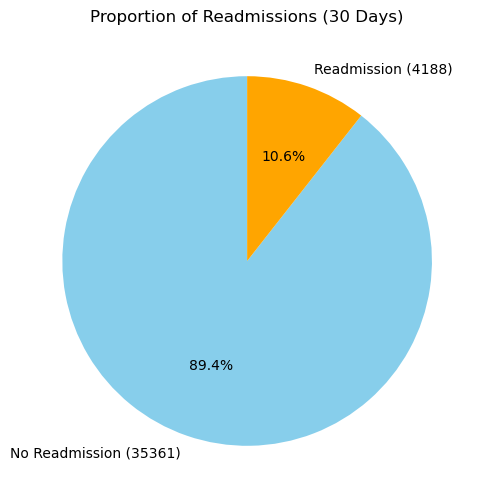

In [116]:
import matplotlib.pyplot as plt

# Calculate readmission counts for 30 days
readmission_counts = notes_diagnosis_adm_df['Readmission'].value_counts()
readmission_30_days = readmission_counts[1]  # Assuming 1 indicates readmission
no_readmission = readmission_counts[0]      # Assuming 0 indicates no readmission

# Display the counts
print(f"Readmission Count (within 30 days): {readmission_30_days}")
print(f"No Readmission Count: {no_readmission}")

# Pie chart for readmission
plt.figure(figsize=(6, 6))
plt.pie(readmission_counts,
        labels=[f'No Readmission ({no_readmission})', f'Readmission ({readmission_30_days})'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'orange'])
plt.title(f'Proportion of Readmissions (30 Days)')
plt.show()


### Dropping Unnecessary Features to reduce the redundancy

In [117]:
# Summary of data types
print("Data Types in the Dataset:")
print(notes_diagnosis_adm_df.dtypes)

# Identify continuous features
continuous_features = notes_diagnosis_adm_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nContinuous Features:")
print(continuous_features)

# Identify categorical features
categorical_features = notes_diagnosis_adm_df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print("\nCategorical Features:")
print(categorical_features)


Data Types in the Dataset:
ROW_ID                                       int64
SUBJECT_ID                                   int64
HADM_ID                                    float64
CATEGORY                                    object
DESCRIPTION                                 object
TEXT                                        object
ADMITTIME                           datetime64[ns]
DISCHTIME                           datetime64[ns]
ADMISSION_TYPE                              object
LEN_OF_STAY                                  int64
Previous_DISCHTIME                          object
Readmission                                  int32
GENDER                                      object
DOB                                 datetime64[ns]
DOD                                         object
EXPIRE_FLAG                                  int64
AGE                                          int32
ICD9_CODE                                   object
PROC_ICD9_CODE                              object
DRG_

#### Removing Past_6_Months_ED_Admission as its is a subset of Past_6_Months_Hospital_Admission to reduce redundancy

In [118]:
# Check if Past_6_Months_ED_Admission is a subset of Past_6_Months_Hospital_Admission
is_subset = (notes_diagnosis_adm_df['Past_6_Months_ED_Admission'] <= notes_diagnosis_adm_df['Past_6_Months_Hospital_Admission']).all()

# Output the result
if is_subset:
    print("Past_6_Months_ED_Admission is a subset of Past_6_Months_Hospital_Admission.")
else:
    print("Past_6_Months_ED_Admission is NOT a subset of Past_6_Months_Hospital_Admission.")


Past_6_Months_ED_Admission is a subset of Past_6_Months_Hospital_Admission.


In [119]:
# Compute correlation
correlation = notes_diagnosis_adm_df[['Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission']].corr()

# Display correlation matrix
print("Correlation matrix:")
print(correlation)

Correlation matrix:
                                  Past_6_Months_Hospital_Admission  \
Past_6_Months_Hospital_Admission                          1.000000   
Past_6_Months_ED_Admission                                0.969116   

                                  Past_6_Months_ED_Admission  
Past_6_Months_Hospital_Admission                    0.969116  
Past_6_Months_ED_Admission                          1.000000  


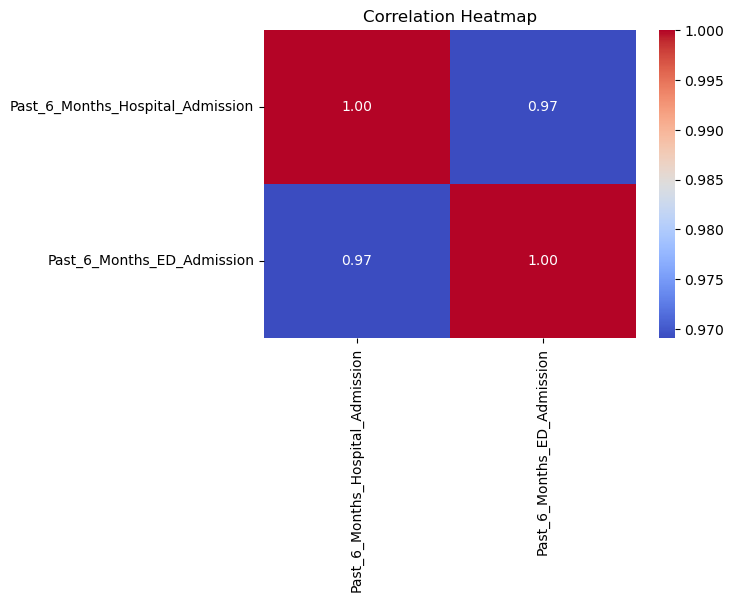

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#### Removing Previous_DISCHTIME as it is a date and we are not using for any visualizations

In [121]:
# Display the first few rows of the Previous_DISCHTIME column
print(notes_diagnosis_adm_df['Previous_DISCHTIME'].head(20))


0                       0
2                       0
3                       0
5                       0
6                       0
7                       0
8                       0
9                       0
10                      0
11    2134-09-24 16:15:00
13                      0
14                      0
15                      0
16                      0
17    2186-07-20 16:00:00
20                      0
21                      0
22                      0
23                      0
24                      0
Name: Previous_DISCHTIME, dtype: object


#### Removing the columns that are not required for the further modelling part

In [122]:
# Dropping the specified columns
columns_to_drop = [
    'Past_6_Months_ED_Admission',
    'CPT_CD',
    'sentiment_scores',
    'TEXT',
    'DOD',
    'Previous_DISCHTIME',
    'DESCRIPTION'
]

notes_diagnosis_adm_df = notes_diagnosis_adm_df.drop(columns=columns_to_drop, axis=1)


In [123]:
notes_diagnosis_adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Readmission,GENDER,...,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,Past_6_Months_Hospital_Admission,ICU_LOS,cleaned_text,patient_feedback,compound,patients_sentiment
0,44005,3,145834.0,Discharge summary,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,0,M,...,76,"[0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...","[9604, 9962, 8964, 9672, 3893, 966]",[416],0,6,admission date discharge date date birth sex s...,patient complained,-0.4019,negative
2,20070,9,150750.0,Discharge summary,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,0,M,...,41,"[431, 5070, 4280, 5849, 2765, 4019]","[9672, 9604]",[14],0,5,admission date discharge date date birth sex s...,None,0.0000,neutral
3,57115,9,150750.0,Discharge summary,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,0,M,...,41,"[431, 5070, 4280, 5849, 2765, 4019]","[9672, 9604]",[14],0,5,name unit admission date discharge date date b...,None,0.0000,neutral
5,20168,13,143045.0,Discharge summary,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,0,F,...,39,"[41401, 4111, 25000, 4019, 2720]","[3612, 3615, 3961, 3761, 8872]",[109],0,3,admission date discharge date date birth sex f...,None,0.0000,neutral
6,57099,13,143045.0,Discharge summary,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,0,F,...,39,"[41401, 4111, 25000, 4019, 2720]","[3612, 3615, 3961, 3761, 8872]",[109],0,3,name c unit admission date discharge date date...,None,0.0000,neutral


In [124]:
# Summary of data types
print("Data Types in the Dataset:")
print(notes_diagnosis_adm_df.dtypes)

# Identify continuous features
continuous_features = notes_diagnosis_adm_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nContinuous Features:")
print(continuous_features)

# Identify categorical features
categorical_features = notes_diagnosis_adm_df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print("\nCategorical Features:")
print(categorical_features)


Data Types in the Dataset:
ROW_ID                                       int64
SUBJECT_ID                                   int64
HADM_ID                                    float64
CATEGORY                                    object
ADMITTIME                           datetime64[ns]
DISCHTIME                           datetime64[ns]
ADMISSION_TYPE                              object
LEN_OF_STAY                                  int64
Readmission                                  int32
GENDER                                      object
DOB                                 datetime64[ns]
EXPIRE_FLAG                                  int64
AGE                                          int32
ICD9_CODE                                   object
PROC_ICD9_CODE                              object
DRG_CODE                                    object
Past_6_Months_Hospital_Admission             int64
ICU_LOS                                      int64
cleaned_text                                object
pati

### Correlation Matrix for Continuous Features

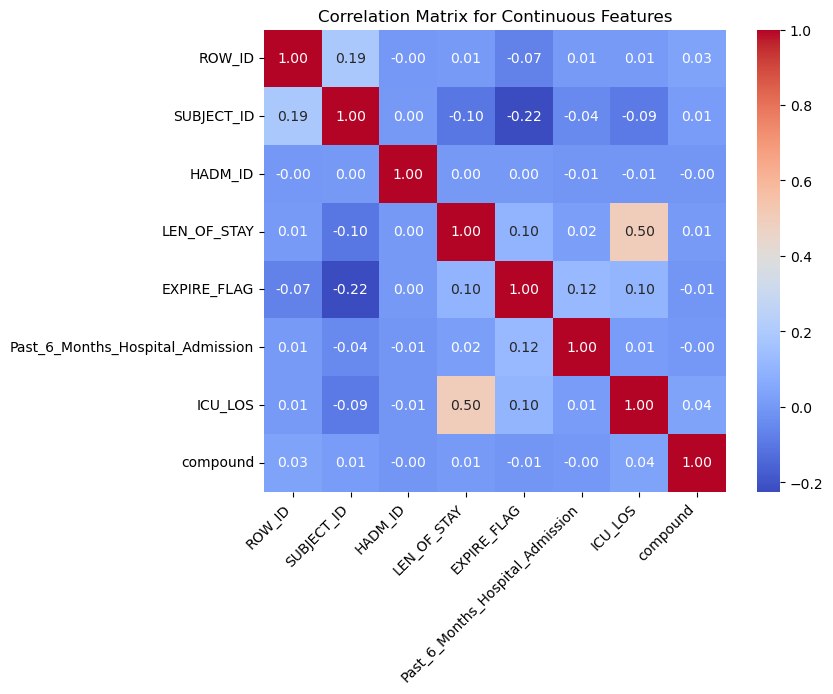

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only continuous features
correlation_data = notes_diagnosis_adm_df[continuous_features]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for Continuous Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### CHI-SQUARE TEST for the categorical variables with the target variable Readmission

In [126]:
# Check data types of categorical features
print(notes_diagnosis_adm_df[categorical_features].dtypes)


CATEGORY              object
ADMISSION_TYPE        object
GENDER                object
ICD9_CODE             object
PROC_ICD9_CODE        object
DRG_CODE              object
cleaned_text          object
patient_feedback      object
patients_sentiment    object
dtype: object


In [127]:
# Convert all categorical features to string
for feature in categorical_features:
    notes_diagnosis_adm_df[feature] = notes_diagnosis_adm_df[feature].astype(str)


In [128]:
from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(data, target, features):
    results = {}
    for feature in features:
        if feature != target:  # Exclude target itself
            contingency_table = pd.crosstab(data[feature], data[target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results[feature] = {'Chi2': chi2, 'p-value': p}
    return pd.DataFrame(results).T

# Perform chi-square test
target_variable = 'Readmission'  # Replace with your target variable
chi_square_results = chi_square_test(notes_diagnosis_adm_df, target_variable, categorical_features)

# Display the results
chi_square_results.sort_values(by='p-value', inplace=True)
print("Chi-Square Test Results:")
print(chi_square_results)

# Filter significant results
significant_features = chi_square_results[chi_square_results['p-value'] < 0.05]
print("\nSignificant Features:")
print(significant_features)


Chi-Square Test Results:
                            Chi2        p-value
PROC_ICD9_CODE      28066.166502  1.575301e-196
DRG_CODE             9157.044554  1.556751e-192
ICD9_CODE           39549.000000  3.103228e-179
cleaned_text        39538.438155   2.444427e-41
patient_feedback     1047.957694   3.518553e-05
ADMISSION_TYPE          4.735991   2.953783e-02
patients_sentiment      3.187475   2.031649e-01
GENDER                  0.019110   8.900510e-01
CATEGORY                0.000000   1.000000e+00

Significant Features:
                          Chi2        p-value
PROC_ICD9_CODE    28066.166502  1.575301e-196
DRG_CODE           9157.044554  1.556751e-192
ICD9_CODE         39549.000000  3.103228e-179
cleaned_text      39538.438155   2.444427e-41
patient_feedback   1047.957694   3.518553e-05
ADMISSION_TYPE        4.735991   2.953783e-02


In [129]:
from tabulate import tabulate

# Display the Chi-Square Test results in tabulated format
print("Chi-Square Test Results:")
chi_square_table = tabulate(chi_square_results.reset_index(),
                            headers=["Feature", "Chi2", "p-value"],
                            tablefmt="fancy_grid",
                            showindex=False)
print(chi_square_table)

# Display the significant features in tabulated format
print("\nSignificant Features (p-value < 0.05):")
significant_features_table = tabulate(significant_features.reset_index(),
                                      headers=["Feature", "Chi2", "p-value"],
                                      tablefmt="fancy_grid",
                                      showindex=False)
print(significant_features_table)


Chi-Square Test Results:
╒════════════════════╤═══════════════╤══════════════╕
│ Feature            │          Chi2 │      p-value │
╞════════════════════╪═══════════════╪══════════════╡
│ PROC_ICD9_CODE     │ 28066.2       │ 1.5753e-196  │
├────────────────────┼───────────────┼──────────────┤
│ DRG_CODE           │  9157.04      │ 1.55675e-192 │
├────────────────────┼───────────────┼──────────────┤
│ ICD9_CODE          │ 39549         │ 3.10323e-179 │
├────────────────────┼───────────────┼──────────────┤
│ cleaned_text       │ 39538.4       │ 2.44443e-41  │
├────────────────────┼───────────────┼──────────────┤
│ patient_feedback   │  1047.96      │ 3.51855e-05  │
├────────────────────┼───────────────┼──────────────┤
│ ADMISSION_TYPE     │     4.73599   │ 0.0295378    │
├────────────────────┼───────────────┼──────────────┤
│ patients_sentiment │     3.18747   │ 0.203165     │
├────────────────────┼───────────────┼──────────────┤
│ GENDER             │     0.0191102 │ 0.890051     │
├──

In [130]:
notes_diagnosis_adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Readmission,GENDER,...,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,Past_6_Months_Hospital_Admission,ICU_LOS,cleaned_text,patient_feedback,compound,patients_sentiment
0,44005,3,145834.0,Discharge summary,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,0,M,...,76,"['0389', '78559', '5849', '4275', '41071', '42...","['9604', '9962', '8964', '9672', '3893', '966']",['416'],0,6,admission date discharge date date birth sex s...,patient complained,-0.4019,negative
2,20070,9,150750.0,Discharge summary,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,0,M,...,41,"['431', '5070', '4280', '5849', '2765', '4019']","['9672', '9604']",['14'],0,5,admission date discharge date date birth sex s...,None,0.0000,neutral
3,57115,9,150750.0,Discharge summary,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,0,M,...,41,"['431', '5070', '4280', '5849', '2765', '4019']","['9672', '9604']",['14'],0,5,name unit admission date discharge date date b...,None,0.0000,neutral
5,20168,13,143045.0,Discharge summary,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,0,F,...,39,"['41401', '4111', '25000', '4019', '2720']","['3612', '3615', '3961', '3761', '8872']",['109'],0,3,admission date discharge date date birth sex f...,None,0.0000,neutral
6,57099,13,143045.0,Discharge summary,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,6,0,F,...,39,"['41401', '4111', '25000', '4019', '2720']","['3612', '3615', '3961', '3761', '8872']",['109'],0,3,name c unit admission date discharge date date...,None,0.0000,neutral


In [137]:
notes_diagnosis_adm_df.head(500).to_csv('seen_data.csv')

In [131]:
# Step 6: Define Target Variable and Split Data
y = notes_diagnosis_adm_df['Readmission']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [132]:
import joblib

# Save the training and testing sets
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

print("Training and testing data saved successfully!")


Training and testing data saved successfully!


In [133]:
import joblib

# Load the training and testing sets
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

print("Training and testing data loaded successfully!")


Training and testing data loaded successfully!


In [134]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (31639, 19144)
y_train shape: (31639,)
X_test shape: (7910, 19144)
y_test shape: (7910,)


# GRU

In [135]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Ensure data is in dense format (if sparse, convert to dense)
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Reshape data for GRU model (treat each sample as a single timestep)
X_train_reshaped = np.expand_dims(X_train_dense, axis=1)
X_test_reshaped = np.expand_dims(X_test_dense, axis=1)

# Define the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the GRU model
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the GRU model
gru_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Save the GRU model
gru_model.save('gru_model_latest.h5')

# Evaluate GRU model on the training and test sets
y_train_pred_gru = (gru_model.predict(X_train_reshaped) > 0.5).astype(int)
y_test_pred_gru = (gru_model.predict(X_test_reshaped) > 0.5).astype(int)

print("GRU Training Classification Report:\n", classification_report(y_train, y_train_pred_gru))
print("GRU Testing Classification Report:\n", classification_report(y_test, y_test_pred_gru))


C:\Users\SnehalChoudhari-I\anaconda3_new\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
791/791 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9094 - loss: 0.2630 - val_accuracy: 0.9526 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 2/100
791/791 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9710 - loss: 0.0793 - val_accuracy: 0.9524 - val_loss: 0.1002 - learning_rate: 0.0010
Epoch 3/100
791/791 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9788 - loss: 0.0538 - val_accuracy: 0.9559 - val_loss: 0.1199 - learning_rate: 0.0010
Epoch 4/100
791/791 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9875 - loss: 0.0310 - val_accuracy: 0.9554 - val_loss: 0.1439 - learning_rate: 0.0010
Epoch 5/100
791/791 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9958 - loss: 0.0168 - val_accuracy: 0.9561 - val_loss: 0.1689 - learning_rate: 5.0000e-04
Epoch 6/100
791/791 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9972 - loss: 0.0123 - val_accuracy: 0.9548 - val_loss: 0.1866 - learning_rate: 5.0000e-04


989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
GRU Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     28276
           1       0.77      0.96      0.86      3363

    accuracy                           0.97     31639
   macro avg       0.88      0.96      0.92     31639
weighted avg       0.97      0.97      0.97     31639

GRU Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      7085
           1       0.73      0.91      0.81       825

    accuracy                           0.95      7910
   macro avg       0.86      0.93      0.89      7910
weighted avg       0.96      0.95      0.96      7910

